---
### Setup
* create a virtual environment
* run `pip install jupyter`
* Set Up Jupyter Kernel: `python -m ipykernel install --user --name=venv --display-name "data-analysis (venv)"
* Select this kernel

In [82]:
# Copy the data out files from the raspberry pi to the data folder with a shell command - SH: command not tested! 
# !scp pi@lohast-IPAdresss:/root/presist/overlay/data/out /data/out

---
## Notebook for `berries` power analysis of all 

---
### Read Data: Read the Data from the `data` folder into the `data_dict` variable
* Reads the data from the `data/out` directory
* Saves the data to the `data_dict` variable

In [83]:
import os
import pandas as pd
from fontTools.misc.bezierTools import approximateQuadraticArcLength

SERVICES  = ['rust-actix', 'rust-actix-syn-orm', 'ruby-sinatra', 'go-gorilla', 'go-gin', 'python-flask', 'python-flask-1-thd', 'c-sharp-razor', 'javascript-express', 'javascript-express-bun'] # 'python-flask', 'go-gorilla', 
base_dir = 'data/out'
dir_out = 'plots/'
data_dict = {}

for service in SERVICES:
    
    service_dir = os.path.join(base_dir, service, 'berries')
    if not os.path.exists(service_dir):
        print(f"Directory does not exist: {service_dir}")
        continue
        
    # iterates of files in service_dir    
    for file_name in os.listdir(service_dir):
        file_path = os.path.join(service_dir, file_name)
            
        # Read the CSV files based on their naming convention
        if file_name.endswith(".csv"):
            if "power" in file_name:
                df_power = pd.read_csv(file_path, sep=',', quotechar='"', on_bad_lines='skip')
                # df_power = df_power[~df_power['iteration'].isin([0, 29])]
                print(f"Reading {service} with file: {file_name}")
                # Calculate timedelta and energy for each row
                grouped = df_power.groupby('iteration')
                df_power['timedelta'] = grouped['timestamp'].diff()
                df_power['timedelta'] = df_power['timedelta'].fillna(0)
                df_power['energy'] = grouped.apply(
                    lambda group: group['power'] * group['timedelta']
                ).reset_index(level=0, drop=True)
                df_power['energy'] = df_power['energy'].fillna(0)
                
                # Calculate cumulative energy per iteration
                df_power['cumulative_energy'] = grouped['energy'].cumsum()
                
                # Create timedelta index
                df_power['timedelta_index'] = df_power.groupby('iteration')['timestamp'].diff().fillna(0).cumsum()
                df_power.set_index('timedelta_index', inplace=True)
                df_power.sort_index(inplace=True)

                # Store DataFrame in data_dict
                data_dict[service] = df_power
                print(f"Data stored in data_dict for {service}")
            else:
                print("dataframe power does not exist")
                
# discard iteration 0 
for service in SERVICES:
    data_dict[service] = data_dict[service][data_dict[service]['iteration'] != 0]


Reading rust-actix with file: rust-actix-power-batch_30_start_1734171065.971284.csv


/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_23687/2890031719.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_power['energy'] = grouped.apply(


Data stored in data_dict for rust-actix
Reading rust-actix-syn-orm with file: rust-actix-power-batch_30_start_1734535682.042392.csv


/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_23687/2890031719.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_power['energy'] = grouped.apply(


Data stored in data_dict for rust-actix-syn-orm
Reading ruby-sinatra with file: ruby-sinatra-power-batch_30_start_1734180856.494142.csv


/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_23687/2890031719.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_power['energy'] = grouped.apply(


Data stored in data_dict for ruby-sinatra
Reading go-gorilla with file: go-gorilla-power-batch_30_start_1734182973.835882.csv


/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_23687/2890031719.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_power['energy'] = grouped.apply(


Data stored in data_dict for go-gorilla
Reading go-gin with file: go-gin-power-batch_30_start_1734185120.237969.csv


/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_23687/2890031719.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_power['energy'] = grouped.apply(


Data stored in data_dict for go-gin
Reading python-flask with file: python-flask-power-batch_30_start_1734174424.712395.csv


/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_23687/2890031719.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_power['energy'] = grouped.apply(


Data stored in data_dict for python-flask
Reading python-flask-1-thd with file: python-flask-power-batch_30_start_1734531098.835856.csv


/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_23687/2890031719.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_power['energy'] = grouped.apply(


Data stored in data_dict for python-flask-1-thd
Reading c-sharp-razor with file: c-sharp-razor-power-batch_30_start_1734288768.462756.csv


/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_23687/2890031719.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_power['energy'] = grouped.apply(


Data stored in data_dict for c-sharp-razor
Reading javascript-express with file: javascript-express-power-batch_30_start_1734266940.177137.csv


/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_23687/2890031719.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_power['energy'] = grouped.apply(


Data stored in data_dict for javascript-express
Reading javascript-express-bun with file: javascript-express-power-batch_30_start_1734269817.644137.csv


/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_23687/2890031719.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_power['energy'] = grouped.apply(


Data stored in data_dict for javascript-express-bun


In [84]:
# Filter the DataFrame for rows where iteration is 1 or 2
df_ruby_sinatra = data_dict['ruby-sinatra']
filtered_df = df_ruby_sinatra[df_ruby_sinatra['iteration'].isin([1, 2])]

# Sort by timedelta_index to ensure the rows are ordered correctly
filtered_df = filtered_df.sort_index()

# Display rows around the transition from iteration 1 to 2
transition_rows = filtered_df[filtered_df['iteration'].diff() == 1]

print("Rows where iteration transitions from 1 to 2:")
print(transition_rows)

# Display the surrounding rows (for context)
print("\nContext around the transition:")
context_rows = filtered_df.loc[transition_rows.index[0] - 2:transition_rows.index[0] + 2]
print(context_rows)

Rows where iteration transitions from 1 to 2:
                    timestamp     power   current   voltage  iteration  \
timedelta_index                                                          
72.9488          1.734181e+09  3.161039  0.632252  4.999657          2   

                 timedelta  energy  cumulative_energy  
timedelta_index                                        
72.9488                0.0     0.0                0.0  

Context around the transition:
                    timestamp     power   current   voltage  iteration  \
timedelta_index                                                          
70.9488          1.734181e+09  2.980871  0.596194  4.999829          1   
70.9489          1.734181e+09  2.984866  0.596952  5.000174          1   
70.9490          1.734181e+09  2.986495  0.597256  5.000361          1   
70.9491          1.734181e+09  2.983957  0.596764  5.000229          1   
70.9492          1.734181e+09  2.983623  0.596694  5.000253          1   
...          

In [85]:
# check applications in data_dict
print("applications in data_dict:")
print(data_dict.keys())
print("dataframe:")
data_dict['ruby-sinatra'][data_dict['ruby-sinatra']['iteration'] == 2]

# Energy accumulated over time

applications in data_dict:
dict_keys(['rust-actix', 'rust-actix-syn-orm', 'ruby-sinatra', 'go-gorilla', 'go-gin', 'python-flask', 'python-flask-1-thd', 'c-sharp-razor', 'javascript-express', 'javascript-express-bun'])
dataframe:


,timestamp,power,current,voltage,iteration,timedelta,energy,cumulative_energy
timedelta_index,,,,,,,,
72.9488,1.734181e+09,3.161039,0.632252,4.999657,2,0.0000,0.000000,0.000000
72.9489,1.734181e+09,3.087111,0.617391,5.000253,2,0.0001,0.000309,0.000309
72.9490,1.734181e+09,3.051762,0.610340,5.000100,2,0.0001,0.000305,0.000614
72.9491,1.734181e+09,3.036126,0.607188,5.000305,2,0.0001,0.000304,0.000918
72.9492,1.734181e+09,3.027349,0.605469,5.000011,2,0.0001,0.000302,0.001220
...,...,...,...,...,...,...,...,...
108.6543,1.734181e+09,3.003921,0.600828,4.999648,2,0.0001,0.000301,111.235961
108.6544,1.734181e+09,3.081014,0.616154,5.000399,2,0.0001,0.000308,111.236269
108.6545,1.734181e+09,3.012960,0.602522,5.000583,2,0.0001,0.000302,111.236570


---
### Helper functions for data pipline sequential analysis

In [86]:
from datetime import datetime
import matplotlib as mpl
# Helper functions for data pipline sequential analysis

def customize_boxplot(bplot, colors, tick_color, median_color):
    """
    Helper function to customize the appearance
    """
    # Customize the box colors
    for patch, color in zip(bplot['boxes'], colors):
        patch.set(color=color, linewidth=1.5)  # Set box outline color and line width
        patch.set(facecolor=color, alpha=0.8)  # Fill the box with the specified color

    # Customize the whiskers
    for whisker in bplot['whiskers']:
        whisker.set(color=tick_color, linewidth=1.5)  # Set whisker color and line width

    # Customize the caps
    for cap in bplot['caps']:
        cap.set(color=tick_color, linewidth=1.5)  # Set cap color and line width

    # Customize the medians
    for median in bplot['medians']:
        median.set(color=median_color, linewidth=1.5)  # Set median line color
        
        
def save_plot(fig, weact_service, plot_type="sequential", filename_suffix="energy"):
    """
    Save a plot to a specific directory with a timestamped filename.
    """
    vector_format="pdf"
    if plot_type == "compare-berries":
        dir_out = f'plots/{plot_type}'
    else:
        dir_out = f'plots/{weact_service}/{plot_type}'
        
    current_time = datetime.now().strftime("%Y-%m-%d_%H:%M")  # Format: YYYY-MM-DD_HH
    # Create the directory if it doesn't exist
    os.makedirs(dir_out, exist_ok=True)
    
    # reduce size
    mpl.rcParams['path.simplify'] = True
    mpl.rcParams['path.simplify_threshold'] = 0.1  
    
    # Save the figure
    fig.savefig(
        os.path.join(dir_out, f"{weact_service}_{filename_suffix}.{vector_format}"),
        bbox_inches='tight',
        dpi=150,
        facecolor='white',
        format='pdf'
    )
    print(f"Plot for {weact_service} ({plot_type}) saved as {filename_suffix} at {dir_out}")
    

def define_title_xlable_ylable_line_chart(analyse):
    """
    Define title, x-label and y-label based on the comparison of
    """
    if analyse == 'power':
        title = 'Power by Language & Framework'
        y_label = 'Power (W)'
    elif analyse == 'delta':
        title = 'Execution Time by Language & Framework'
        y_label = 'Time (s)'
    elif 'cumulative_energy':
        title = 'Energy Spent Over Time by Language & Framework'
        y_label = 'Energy (J)'
    else:
        print("No valid metric defined")
    x_label = 'Time (s)'
    return title, x_label, y_label

def define_title_xlable_ylable_boxplot(analyse):
    """
    Define title, x-label and y-label based on the comparison of
    """
    if analyse == 'power':
        title = 'Power by Language & Framework'
        y_label = 'Power (W)'
    elif analyse == 'running_time':
        title = 'Execution Time by Language & Framework'
        y_label = 'Time (s)'
    elif analyse == 'energy':
        title = 'Energy Consumption by Language & Framework'
        y_label = 'Energy (J)'
    x_label = 'Language & Framework'
    return title, x_label, y_label


flierprops = {
        'marker': 'o',
        'markerfacecolor': '#D7B0FF',
        'markeredgecolor': '#978AB5',
        'markersize': 2,
        'linestyle': 'none',
        'alpha': 0.2,
}

---
### Line Chart: Power Consumption Over Time for a Single Application Run

* This step plots a single application run's power consumption over time.
* plots the defined metric for all endpoints for a single service


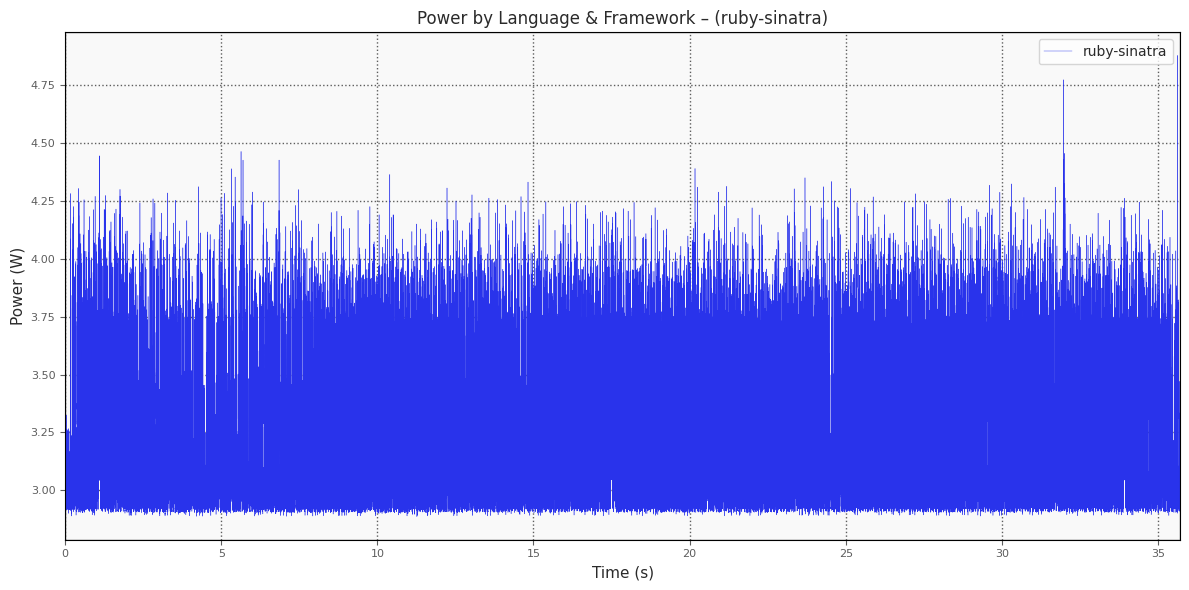

In [87]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

waect_service = 'ruby-sinatra' # define service to be ploted
metric = 'power' # define metric to be ploted `power` and `energy`
df = data_dict[waect_service][data_dict[waect_service]['iteration'] == 2].copy()

df['adjusted_index'] = df.index - df.index.min()
# settings for this plot
labels_fontsize = 11
labels_fontcolor = "#2A2A2A"
title_fontsize = 12
tick_color = "#5D5D5D"

# Plot single run power consumption
fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')
fig.patch.set_facecolor('#FFFFFF') 
ax.set_facecolor('#F9F9F9')

ax.plot(
    df['adjusted_index'],
    df[metric],
    linewidth=0.3,
    color='#2933EB'
)

# only if cumulative energy is polotted
if metric == 'cumulative_energy':
    ax.fill_between(
        df['adjusted_index'],
        df[metric],
        color='#2933EB',
        alpha=0.3 
    )
    
# Set title and labels
title, x_label, y_label = define_title_xlable_ylable_line_chart(metric)

ax.grid(True, linestyle='dotted', linewidth=1, color=tick_color)  # Setting custom grid color
ax.set_title(f'{title} – ({waect_service})', color=labels_fontcolor, fontsize=title_fontsize)  # Set an appropriate title
ax.set_xlabel(f"{x_label}", color=labels_fontcolor, fontsize=labels_fontsize,)  # Set an appropriate label for the x-axis
ax.set_ylabel(f"{y_label}", color=labels_fontcolor, fontsize=labels_fontsize)  # Label for the y-axis
ax.tick_params(labelsize=8, color=tick_color, labelcolor=tick_color)
ax.autoscale(enable=True, axis="x", tight=True)

border = Rectangle(
    (0, 0), 1, 1,
    transform=ax.transAxes,
    facecolor='none',
    edgecolor=tick_color,
    linewidth=1.0  
)

ax.add_patch(border)
    
ax.legend([waect_service], loc='upper right', fontsize=10, labelcolor=labels_fontcolor,facecolor="white", framealpha=0.8)
plt.tight_layout()
plt.show()

In [88]:
# Save the plot
save_plot(fig, waect_service, "berries", metric)

Plot for ruby-sinatra (berries) saved as power at plots/ruby-sinatra/berries


---
### Line Chart: Power Consumption Over Time for two applications runs

In [89]:
reindexed_data_dict = {}

SERVICES = ['rust-actix', 'ruby-sinatra', 'go-gorilla', 'go-gin', 'python-flask', 'c-sharp-razor', 'javascript-express'] # Define the services to compare

# Determine the union of all timedelta_index values across the services
all_timedelta_indices = set()
for service in SERVICES:
    original_df = data_dict[service]
    iteration_1_df = original_df[original_df['iteration'] == 1].copy()  # choose only index 1
    reindexed_data_dict[service] = iteration_1_df
    all_timedelta_indices.update(reindexed_data_dict[service].index)
    
# Create a sorted list of all unique indices
all_timedelta_indices = sorted(all_timedelta_indices)

# Reindex each DataFrame to match the union of all timedelta_index values
for service in SERVICES:
    reindexed_data_dict[service] = reindexed_data_dict[service].reindex(all_timedelta_indices)

# Check the lengths of the DataFrames to confirm they are now the same
for service in SERVICES:
    print(f"{service} length: {len(reindexed_data_dict[service])}")
    

rust-actix length: 1056812
ruby-sinatra length: 1056812
go-gorilla length: 1056812
go-gin length: 1056812
python-flask length: 1056812
c-sharp-razor length: 1056812
javascript-express length: 1056812


In [90]:
# metric = 'cumulative_energy'  # Define the metric to compare - possible: 'power' & 'cumulative_energy'
# 
# # Plot cumulative energy consumption for both services
# fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')
# fig.patch.set_facecolor('#FFFFFF')
# ax.set_facecolor('#F9F9F9')
# 
# # Define colors for each service
# colors = ['#2933EB', '#993200', '#FF007E', '#DCF5FB', '#FF7651', '#DCF5FB', '#FF7651']  # Blue for python-flask, Brown for go-gorilla
# alphas = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0,5]  # Transparency for filled areas
# 
# # determine line alpha based on metric
# if metric == 'power':
#     line_alpha = 0.65
# else:  
#     line_alpha = 1.0
# 
# # Plotting cumulative energy with fill_between
# for i, service in enumerate(SERVICES):
#     filtered_data = reindexed_data_dict[service] # [data_dict[service]['iteration'] == 2]
#     ax.plot(
#         filtered_data.index,
#         filtered_data[metric],
#         linewidth=0.5,
#         color=colors[i],
#         label=service,
#         alpha=line_alpha
#     )
#     if metric == 'cumulative_energy':
#         ax.fill_between(
#             filtered_data.index,
#             filtered_data[metric],
#             color=colors[i],
#             alpha=alphas[i]
#         )
#         
# # Customize grid, labels, etc.
# ax.grid(True, linestyle='dotted', linewidth=1.2, color=tick_color)
# title, x_label, y_label = define_title_xlable_ylable_line_chart(metric)
# ax.set_title(f'{title} – {", ".join(SERVICES)}', color=labels_fontcolor, fontsize=title_fontsize)
# ax.set_xlabel(f"{x_label}", color=labels_fontcolor, fontsize=labels_fontsize)
# ax.set_ylabel(f"{y_label}", color=labels_fontcolor, fontsize=labels_fontsize)
# ax.tick_params(labelsize=8, color=tick_color, labelcolor=tick_color)
# ax.autoscale(enable=True, axis="x", tight=True)
# 
# # Adding a border around the plot area (axes)
# border = Rectangle(
#     (0, 0), 1, 1,
#     transform=ax.transAxes,
#     facecolor='none',
#     edgecolor=tick_color,
#     linewidth=1
# )
# ax.add_patch(border)
# 
# # Add legend to distinguish between the services
# ax.legend(loc='upper right', fontsize=10, labelcolor=labels_fontcolor, facecolor="white", framealpha=0.8)
# 
# plt.tight_layout()
# plt.show()

In [91]:
# Save the plot
# save_plot(fig, f'{"_".join(SERVICES)}_line_chart', plot_type="compare-berries", filename_suffix=metric)

---
### Boxplot: Boxplot for Power Consumption Comparison Across Applications

* plots a boxplot for power consumption comparison across applications.
* Define the services to compare 
* Define the metric to analyse `power`, `delta`, `energy`

In [92]:
data_dict['rust-actix'].head()

,timestamp,power,current,voltage,iteration,timedelta,energy,cumulative_energy
timedelta_index,,,,,,,,
53.4879,1.734171e+09,2.962494,0.592464,5.000293,1,0.0000,0.000000,0.000000
53.4880,1.734171e+09,2.963493,0.592664,5.000295,1,0.0001,0.000297,0.000297
53.4881,1.734171e+09,2.962789,0.592543,5.000122,1,0.0001,0.000296,0.000593
53.4882,1.734171e+09,2.962193,0.592417,5.000179,1,0.0001,0.000297,0.000889
53.4883,1.734171e+09,2.961320,0.592266,4.999982,1,0.0001,0.000296,0.001185


In [93]:
# Define services and endpoints
def plot_application_comparison(data_dict, applications, metric='energy', group_colors=None, median_color="#EB4532"):
    """
    Plot a comparison of services based on a specific metric using box plots.

    Parameters:
    - data_dict (dict): A dictionary where keys are service names and values are their data as DataFrames.
    - services (list): List of services to compare.
    - metric (str): The metric to use for comparison ('energy', 'running_time', etc.).
    - group_colors (list): List of colors to alternate between for the box plots.
    - median_color (str): Color for the median lines in the box plots.
    """
    grouped_data = []
    labels = []
    group_colors = ['#2933EB', '#2933EB']
    median_color = "#EB4532"
    
    for service in applications:
        # grouping 
        df_service = data_dict[service]
        if metric == 'energy':
            service_metric_data = df_service.groupby('iteration')['cumulative_energy'].last()
        elif metric == 'running_time':
            service_metric_data = df_service.groupby('iteration').apply(lambda group: group['timestamp'].iloc[-1] - group['timestamp'].iloc[0])
        else:
            service_metric_data = df_service[metric]
        grouped_data.append(service_metric_data)
        labels.append(service)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(6, 8), facecolor='white')
    ax.set_facecolor('#F9F9F9')
    
    flierprops = {
        'marker': 'o',
        'markerfacecolor': '#D7B0FF',
        'markeredgecolor': '#978AB5',
        'markersize': 5,
        'alpha': 0.4,
    }   
    
    # Box plot
    bplot = ax.boxplot(
        grouped_data,
        patch_artist=True,
        widths=0.6,
        labels=labels,
        flierprops=flierprops
    )
    # raster fliers
    for line in bplot['fliers']:
        line.set_rasterized(True)
    
    for i, patch in enumerate(bplot['boxes']):
        patch.set(facecolor=group_colors[i % 2], alpha=0.8)  # Alternate colors for services
        patch.set(color=group_colors[i % 2], linewidth=1.2)
        patch.set(linewidth=1.2)  # Set border width
        
    customize_boxplot(bplot, group_colors, tick_color, median_color)
    
    # Set title and labels
    title, x_label, y_label = define_title_xlable_ylable_boxplot(metric)
    ax.set_title(f'{title}', color=labels_fontcolor, fontsize=title_fontsize)
    ax.set_ylabel(f'{y_label}', color=labels_fontcolor, fontsize=labels_fontsize)
    ax.set_xlabel(f'{x_label}', color=labels_fontcolor, fontsize=labels_fontsize)
    
    # Customize tick labels
    ax.tick_params(axis='x', labelsize=10, rotation=22.5, labelcolor='#5D5D5D')
    ax.tick_params(axis='y', labelsize=10, labelcolor='#5D5D5D')
    ax.grid(True, linestyle='dotted', linewidth=1.0, color=tick_color)
    
    # Add legend
    handles = [plt.Rectangle((0, 0), 1, 1, color=color, alpha=0.8) for color in group_colors]
    # ax.legend(handles, legend_labels, loc='upper right', fontsize=10)
    
    # Optional set y-axis limits for better visualization
    # ax.set_ylim(2.8, 3.5)
    # Show the plot
    plt.tight_layout()
    plt.show()
    return fig


/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_23687/1641383249.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(


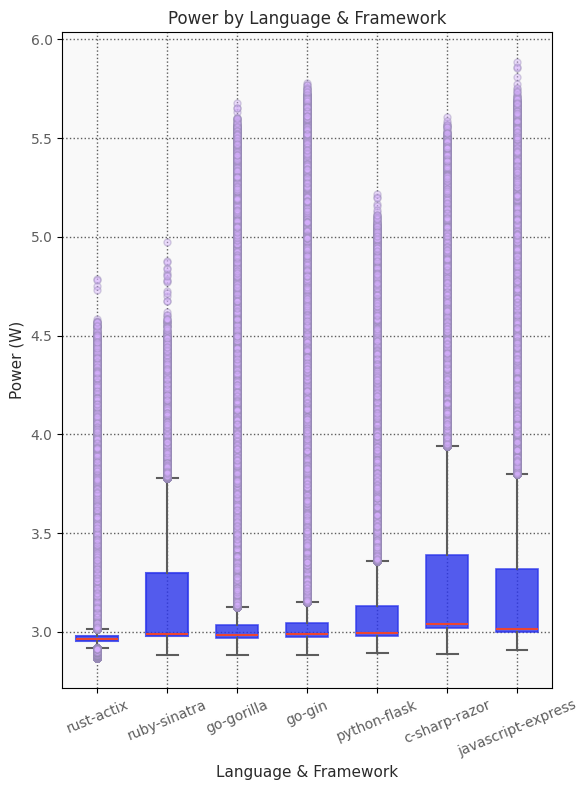

In [94]:
# plot results power
applications = ['rust-actix', 'ruby-sinatra', 'go-gorilla', 'go-gin', 'python-flask', 'c-sharp-razor', 'javascript-express']
metric = 'power'
fig = plot_application_comparison(
        data_dict=data_dict,
        applications=applications,
        metric=metric
        )

In [95]:
# save results power
save_plot(fig, f'all_apps_rslt', plot_type="compare-berries", filename_suffix=metric)

Plot for all_apps_rslt (compare-berries) saved as power at plots/compare-berries


/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_23687/1641383249.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  service_metric_data = df_service.groupby('iteration').apply(lambda group: group['timestamp'].iloc[-1] - group['timestamp'].iloc[0])
/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_23687/1641383249.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  service_metric_data 

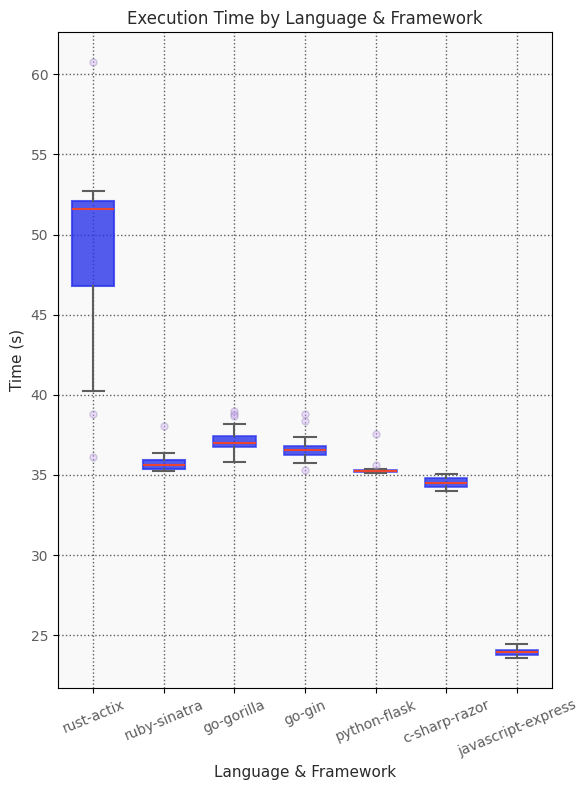

In [96]:
# plot results running time
metric = 'running_time'
fig = plot_application_comparison(
        data_dict=data_dict,
        applications=applications,
        metric=metric
        )

In [97]:
# save results running time
save_plot(fig, f'all_apps_rslt', plot_type="compare-berries", filename_suffix=metric)

Plot for all_apps_rslt (compare-berries) saved as running_time at plots/compare-berries


/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_23687/1641383249.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(


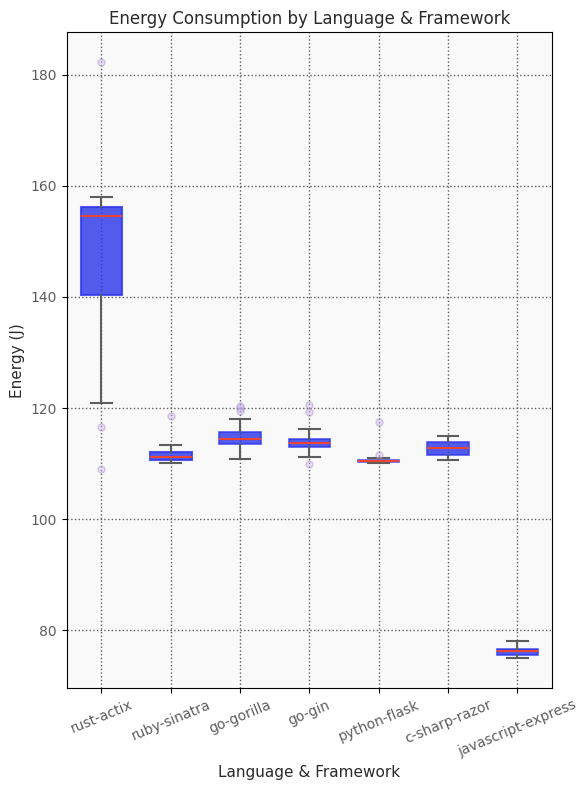

In [98]:
# plot results energy
metric = 'energy'
fig = plot_application_comparison(
        data_dict=data_dict,
        applications=applications,
        metric=metric
        )

In [99]:
# save the energy consumption
save_plot(fig, f'all_apps_rslt', plot_type="compare-berries", filename_suffix=metric)

Plot for all_apps_rslt (compare-berries) saved as energy at plots/compare-berries


/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_23687/1641383249.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(


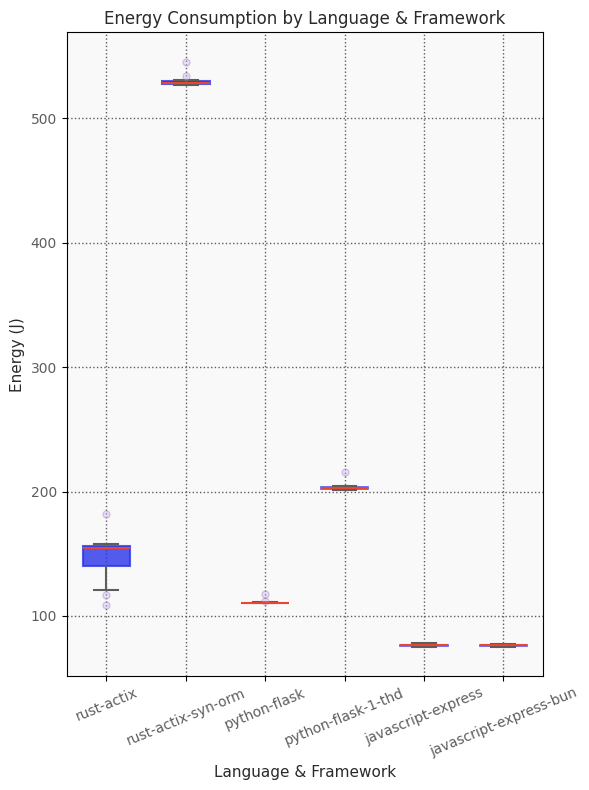

In [100]:
# special cases: 
applications = ['rust-actix', 'rust-actix-syn-orm', 'python-flask', 'python-flask-1-thd', 'javascript-express', 'javascript-express-bun']
metric = 'energy'
fig = plot_application_comparison(
        data_dict=data_dict,
        applications=applications,
        metric=metric
        )

In [101]:
# save special cases plot
save_plot(fig, f'all_spl_apps_rslt', plot_type="compare-berries", filename_suffix=metric)

Plot for all_spl_apps_rslt (compare-berries) saved as energy at plots/compare-berries


---
### Table: Final Energy Consumption for Each Application
* Calculate the final energy consumption for each application all metrics
* calculte min, q1, median, q3, max, arithmetic mean, std

In [102]:
# descriptive statistics for each application - power
from matplotlib.cbook import boxplot_stats

final_results = {}
SERVICES  = ['rust-actix', 'ruby-sinatra', 'go-gorilla', 'go-gin', 'python-flask', 'c-sharp-razor', 'javascript-express']

for service in SERVICES:
    # Extract the power metric for the service
    df_service = data_dict[service]
    final_energy = df_service['power']
    
    # boxplot_stats to get the statistics
    stats = boxplot_stats(final_energy)

    # Extract the values for min, q1, median, q3, max, mean, and std
    q0 = stats[0]['whislo']  # Lower whisker
    q4 = stats[0]['whishi'] # Upper whisker
    q1 = stats[0]['q1']   # First quartile
    q3 = stats[0]['q3']   # Third quartile
    median = stats[0]['med']  # Median
    mean = final_energy.mean()
    std = final_energy.std()
    
    # Calculate statistics
    statistics = {
        "min (q0)": round(q0, 3),
        "q1": round(q1, 3),
        "median (q2)": round(median, 3),
        "q3": round(q3, 3),
        "max (q4)": round(q4, 3),
        "mean (μ)": round(mean, 3),
        "std (σ)": round(std, 3),
    }
    final_results[service] = statistics

final_results_df = pd.DataFrame(final_results)
final_results_df = final_results_df.T
final_results_df.reset_index(inplace=True)
final_results_df.rename(columns={'index': 'application'}, inplace=True)

print(final_results_df)
    

          application  min (q0)     q1  median (q2)     q3  max (q4)  \
0          rust-actix     2.918  2.954        2.965  2.979     3.016   
1        ruby-sinatra     2.884  2.977        2.992  3.298     3.778   
2          go-gorilla     2.882  2.972        2.985  3.033     3.124   
3              go-gin     2.884  2.974        2.988  3.044     3.150   
4        python-flask     2.894  2.981        2.996  3.133     3.361   
5       c-sharp-razor     2.886  3.019        3.040  3.387     3.940   
6  javascript-express     2.907  2.998        3.015  3.318     3.798   

   mean (μ)  std (σ)  
0     3.001    0.150  
1     3.123    0.260  
2     3.093    0.281  
3     3.111    0.304  
4     3.135    0.295  
5     3.266    0.451  
6     3.180    0.331  


In [103]:
# save descriptive statistics for each application - power
final_results_df.to_csv('./result_tables/berries/descr_stats_mult_ct_power.csv', index=False, sep=';')

In [104]:
final_results = {}

for service in SERVICES:
    # Extract cumulative_energy for the last value in each iteration
    df_service = data_dict[service]
    final_energy = df_service.groupby('iteration').apply(lambda group: group['timestamp'].iloc[-1] - group['timestamp'].iloc[0])

    # boxplot_stats to get the statistics
    stats = boxplot_stats(final_energy)

    # Extract the values for min, q1, median, q3, max, mean, and std
    q0 = stats[0]['whislo']  # Lower whisker
    q4 = stats[0]['whishi'] # Upper whisker
    q1 = stats[0]['q1']   # First quartile
    q3 = stats[0]['q3']   # Third quartile
    median = stats[0]['med']  # Median
    mean = final_energy.mean()
    std = final_energy.std()
    
    # Calculate statistics
    statistics = {
        "min (q0)": round(q0, 3),
        "q1": round(q1, 3),
        "median (q2)": round(median, 3),
        "q3": round(q3, 3),
        "max (q4)": round(q4, 3),
        "mean (μ)": round(mean, 3),
        "std (σ)": round(std, 3),
    }
    final_results[service] = statistics

final_results_df = pd.DataFrame(final_results)
final_results_df = final_results_df.T
final_results_df.reset_index(inplace=True)
final_results_df.rename(columns={'index': 'application'}, inplace=True)

print(final_results_df)

/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_23687/2237599350.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_energy = df_service.groupby('iteration').apply(lambda group: group['timestamp'].iloc[-1] - group['timestamp'].iloc[0])
/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_23687/2237599350.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_energy = df_service.gro

          application  min (q0)      q1  median (q2)      q3  max (q4)  \
0          rust-actix    40.256  46.818       51.580  52.104    52.738   
1        ruby-sinatra    35.265  35.388       35.641  35.909    36.396   
2          go-gorilla    35.784  36.720       36.974  37.405    38.184   
3              go-gin    35.740  36.272       36.530  36.791    37.385   
4        python-flask    35.096  35.180       35.234  35.290    35.375   
5       c-sharp-razor    33.994  34.234       34.482  34.794    35.084   
6  javascript-express    23.553  23.783       23.986  24.071    24.428   

   mean (μ)  std (σ)  
0    49.622    4.946  
1    35.746    0.542  
2    37.174    0.754  
3    36.664    0.704  
4    35.325    0.443  
5    34.524    0.329  
6    23.956    0.218  


/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_23687/2237599350.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_energy = df_service.groupby('iteration').apply(lambda group: group['timestamp'].iloc[-1] - group['timestamp'].iloc[0])


In [105]:
# save descriptive statistics for each application - running time
final_results_df.to_csv('./result_tables/berries/descr_stats_mult_ct_running_time.csv', index=False, sep=';')

In [106]:
# descriptive statistics for each application - energy
final_results = {}

for service in SERVICES:
    # Extract cumulative_energy for the last value in each iteration
    df_service = data_dict[service]
    final_energy = df_service.groupby('iteration')['cumulative_energy'].last()
    
    # boxplot_stats to get the statistics
    stats = boxplot_stats(final_energy)

    # Extract the values for min, q1, median, q3, max, mean, and std
    q0 = stats[0]['whislo']  # Lower whisker
    q4 = stats[0]['whishi'] # Upper whisker
    q1 = stats[0]['q1']   # First quartile
    q3 = stats[0]['q3']   # Third quartile
    median = stats[0]['med']  # Median
    mean = final_energy.mean()
    std = final_energy.std()
    
    # Calculate statistics
    statistics = {
        "min (q0)": round(q0, 3),
        "q1": round(q1, 3),
        "median (q2)": round(median, 3),
        "q3": round(q3, 3),
        "max (q4)": round(q4, 3),
        "mean (μ)": round(mean, 3),
        "std (σ)": round(std, 3),
    }
    final_results[service] = statistics

final_results_df = pd.DataFrame(final_results)
final_results_df = final_results_df.T
final_results_df.reset_index(inplace=True)
final_results_df.rename(columns={'index': 'application'}, inplace=True)
print(final_results_df)

          application  min (q0)       q1  median (q2)       q3  max (q4)  \
0          rust-actix   120.972  140.400      154.610  156.185   158.081   
1        ruby-sinatra   110.200  110.607      111.279  112.060   113.349   
2          go-gorilla   110.833  113.553      114.358  115.683   117.991   
3              go-gin   111.229  112.918      113.775  114.375   116.311   
4        python-flask   110.050  110.312      110.497  110.649   110.968   
5       c-sharp-razor   110.652  111.542      112.843  113.872   115.034   
6  javascript-express    74.940   75.543       76.231   76.640    78.042   

   mean (μ)  std (σ)  
0   148.900   14.715  
1   111.637    1.606  
2   114.992    2.275  
3   114.054    2.145  
4   110.742    1.332  
5   112.755    1.266  
6    76.169    0.804  


In [107]:
# save descriptive statistics for each application - energy
final_results_df.to_csv('./result_tables/berries/descr_stats_mult_ct_energy.csv', index=False, sep=';')

In [108]:
# descriptive statistics for each application - special cases energy
SERVICES = ['rust-actix', 'rust-actix-syn-orm', 'python-flask', 'python-flask-1-thd', 'javascript-express', 'javascript-express-bun']
final_results = {}

for service in SERVICES:
    # Extract cumulative_energy for the last value in each iteration
    df_service = data_dict[service]
    final_energy = df_service.groupby('iteration')['cumulative_energy'].last()
    
    # boxplot_stats to get the statistics
    stats = boxplot_stats(final_energy)

    # Extract the values for min, q1, median, q3, max, mean, and std
    q0 = stats[0]['whislo']  # Lower whisker
    q4 = stats[0]['whishi'] # Upper whisker
    q1 = stats[0]['q1']   # First quartile
    q3 = stats[0]['q3']   # Third quartile
    median = stats[0]['med']  # Median
    mean = final_energy.mean()
    std = final_energy.std()
    
    # Calculate statistics
    statistics = {
        "min (q0)": round(q0, 3),
        "q1": round(q1, 3),
        "median (q2)": round(median, 3),
        "q3": round(q3, 3),
        "max (q4)": round(q4, 3),
        "mean (μ)": round(mean, 3),
        "std (σ)": round(std, 3),
    }
    final_results[service] = statistics

final_results_df = pd.DataFrame(final_results)
final_results_df = final_results_df.T
final_results_df.reset_index(inplace=True)
final_results_df.rename(columns={'index': 'application'}, inplace=True)
print(final_results_df)

              application  min (q0)       q1  median (q2)       q3  max (q4)  \
0              rust-actix   120.972  140.400      154.610  156.185   158.081   
1      rust-actix-syn-orm   526.692  527.652      528.734  529.870   531.265   
2            python-flask   110.050  110.312      110.497  110.649   110.968   
3      python-flask-1-thd   201.279  201.821      202.478  203.385   204.425   
4      javascript-express    74.940   75.543       76.231   76.640    78.042   
5  javascript-express-bun    75.275   75.883       76.625   76.932    77.732   

   mean (μ)  std (σ)  
0   148.900   14.715  
1   529.415    3.473  
2   110.742    1.332  
3   203.034    2.582  
4    76.169    0.804  
5    76.444    0.659  


In [109]:
final_results_df.to_csv('./result_tables/berries/descr_stats_mult_ct_special_cases_energy.csv', index=False, sep=';')

---
### Confidence Interval: Power Consumption Comparison Across Applications

In [110]:
from scipy.stats import t
import numpy as np

def calculate_confidence_interval_and_sample(data, confidence_level=0.9, desired_margin_of_error=0.1):
    mean = round(data.mean(), 3)
    std_dev = data.std()
    n = len(data)
    degrees_freedom = n - 1
    critical_value = t.ppf((1 + confidence_level) / 2, degrees_freedom)
    
    margin_of_error = round(critical_value * (std_dev / (n ** 0.5)), 3)
    
    lower_bound = round(mean - margin_of_error, 3)
    upper_bound = round(mean + margin_of_error, 3)
    
    required_sample_size = (critical_value * std_dev / desired_margin_of_error) ** 2
    required_sample_size = round(np.ceil(required_sample_size), 3)  # Round up to the next whole number
    
    return mean, lower_bound, upper_bound, margin_of_error, required_sample_size

# Create a summary DataFrame
summary_data = []

for app, app_data in data_dict.items():
    df_service = pd.DataFrame(app_data)
    final_energy = df_service.groupby('iteration')['cumulative_energy'].last()
    mean, lower_bound, upper_bound, margin_of_error, required_sample_size = calculate_confidence_interval_and_sample(final_energy)
    
    summary_data.append({
        "Application": app,
        "Mean Energy (J)": mean,
        "Lower Bound (90%)": lower_bound,
        "Upper Bound (90%)": upper_bound,
        "Margin of Error": margin_of_error,
        "Required Sample Size": required_sample_size
    })

summary_df = pd.DataFrame(summary_data)

# Display the summary table
print(summary_df)

              Application  Mean Energy (J)  Lower Bound (90%)  \
0              rust-actix          148.900            144.252   
1      rust-actix-syn-orm          529.415            528.318   
2            ruby-sinatra          111.637            111.130   
3              go-gorilla          114.992            114.273   
4                  go-gin          114.054            113.376   
5            python-flask          110.742            110.321   
6      python-flask-1-thd          203.034            202.218   
7           c-sharp-razor          112.755            112.355   
8      javascript-express           76.169             75.915   
9  javascript-express-bun           76.444             76.236   

   Upper Bound (90%)  Margin of Error  Required Sample Size  
0            153.548            4.648               62657.0  
1            530.512            1.097                3490.0  
2            112.144            0.507                 747.0  
3            115.711            0.71

In [111]:
summary_df.to_csv('./result_tables/berries/cl_all_apl_.csv', index=False, sep=';')

* make a good story!!!

* running os + docker 
* only the application takes - this amount!
* related work suggested - there not very close but in ours it is close 
* A real application behave not as drastic difference 

* Massage the question so we don't know what we are talking about!
* what we generate is the truth! 
* suprising result is always future work! 

* popular belelive of complied languages -
* Dreading interpraped langues -

* write down the goal of this thsis:
* Is it possible to compare them and fair? 

* Case repo pops up - keep contact! 
* Go to the first step in the direction - 